# 0. Data load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Dacon_RF_parameter_tuning

/content/drive/MyDrive/Dacon_RF_parameter_tuning


In [ ]:
ls

EDA_Gridsearch_delete.ipynb  EDA.ipynb         sample_submission.csv  submit.ipynb     train.csv
EDA_Gridsearch.ipynb         grid_test2.ipynb  submit/                test_grid.ipynb


In [ ]:
import random
random.seed(42)

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login
0,0,0,3.0,1.0,1.0,0.0,0,0.000000,0.000000,1
1,1,1,111.0,26.0,7.0,2.0,0,0.072072,0.000000,1
2,3,1,13.0,13.0,11.0,7.0,0,0.076923,1.000000,1
3,4,1,28.0,12.0,5.0,0.0,0,0.071429,0.071429,1
4,5,1,4.0,4.0,4.0,0.0,2,0.000000,0.000000,1


# 1. EDA
- feature 별 데이터 분포 확인
- 대부분의 feature가 작은 수로 매우 편향되어 있는 것을 확인

In [ ]:
train['Sex'].value_counts()

0    708
1    601
Name: Sex, dtype: int64

In [ ]:
train['past_login_total'].value_counts()

1.0      569
2.0      147
0.0      139
3.0       82
4.0       55
        ... 
134.0      1
77.0       1
111.0      1
33.0       1
42.0       1
Name: past_login_total, Length: 69, dtype: int64

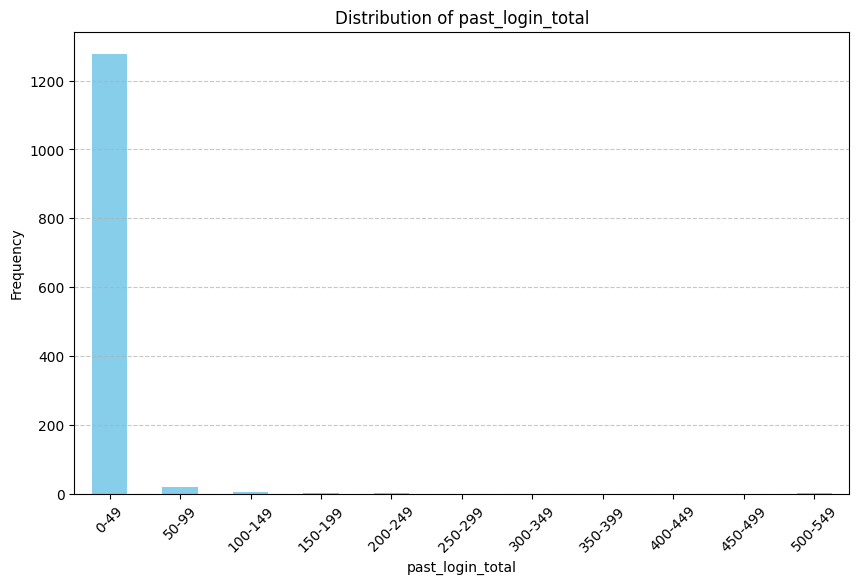

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터프레임에서 past_login_total 열 추출
past_login_total = train['past_login_total']

# 막대그래프를 그리기 위한 연속형 데이터의 분포 계산
bin_edges = range(0, int(past_login_total.max()) + 50, 50)
bin_labels = [f'{i}-{i+49}' for i in bin_edges[:-1]]  # 막대그래프의 x축 라벨 생성
binned_data = pd.cut(past_login_total, bins=bin_edges, labels=bin_labels, include_lowest=True)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
binned_data.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of past_login_total')
plt.xlabel('past_login_total')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 라인 추가
plt.show()

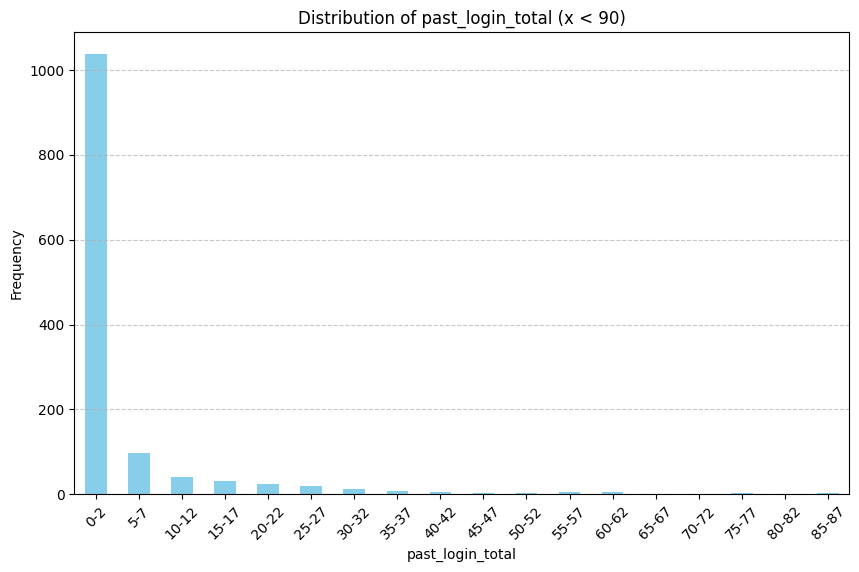

In [ ]:
# 위 그래프에서 x축이 90 이하인 부분만 확대
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터프레임에서 past_login_total 열 추출
past_login_total = train['past_login_total']

# 250 미만인 부분만 필터링
filtered_data = past_login_total[past_login_total < 90]

# 막대그래프를 그리기 위한 연속형 데이터의 분포 계산
bin_edges = range(0, int(filtered_data.max()) + 5, 5)
bin_labels = [f'{i}-{i+2}' for i in bin_edges[:-1]]  # 막대그래프의 x축 라벨 생성
binned_data = pd.cut(filtered_data, bins=bin_edges, labels=bin_labels, include_lowest=True)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
binned_data.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of past_login_total (x < 90)')
plt.xlabel('past_login_total')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 라인 추가
plt.show()

In [ ]:
train['past_1_month_login'].value_counts()

0.0     1113
1.0       92
2.0       33
3.0       17
6.0       13
5.0        9
4.0        9
8.0        3
11.0       3
9.0        3
12.0       3
7.0        2
26.0       1
27.0       1
93.0       1
17.0       1
13.0       1
21.0       1
29.0       1
10.0       1
18.0       1
Name: past_1_month_login, dtype: int64

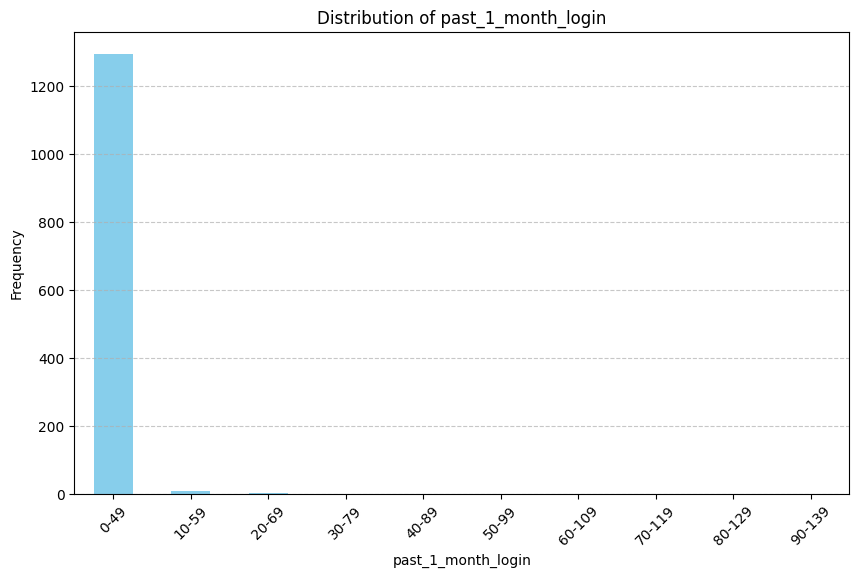

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터프레임에서 past_1_month_login 열 추출
past_1_month_login = train['past_1_month_login']

# 막대그래프를 그리기 위한 연속형 데이터의 분포 계산
bin_edges = range(0, int(past_1_month_login.max()) + 10, 10)
bin_labels = [f'{i}-{i+49}' for i in bin_edges[:-1]]  # 막대그래프의 x축 라벨 생성
binned_data = pd.cut(past_1_month_login, bins=bin_edges, labels=bin_labels, include_lowest=True)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
binned_data.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of past_1_month_login')
plt.xlabel('past_1_month_login')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 라인 추가
plt.show()

In [ ]:
train['past_1_week_login'].value_counts()

0.0     1185
1.0       65
2.0       22
4.0        8
3.0        8
5.0        7
6.0        5
7.0        2
11.0       2
8.0        2
9.0        1
23.0       1
17.0       1
Name: past_1_week_login, dtype: int64

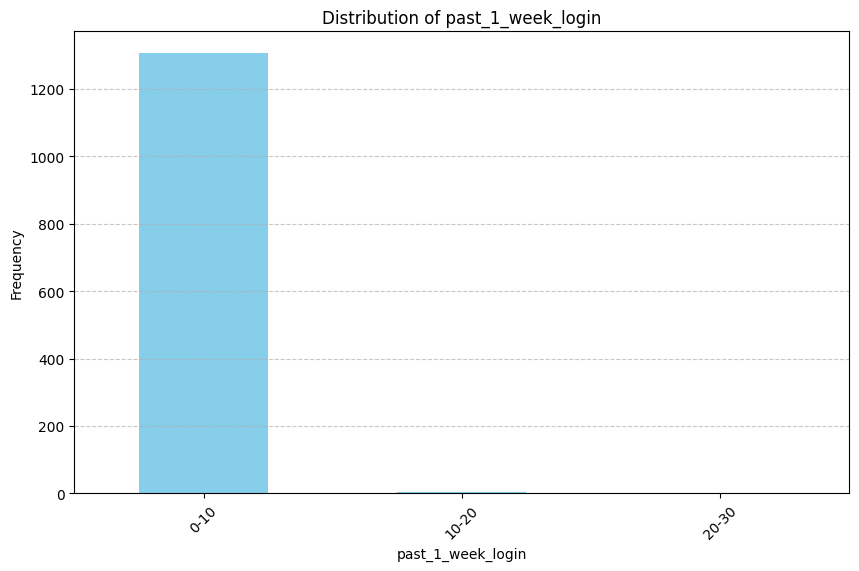

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터프레임에서 past_1_week_login 열 추출
past_1_week_login = train['past_1_week_login']

# 막대그래프를 그리기 위한 연속형 데이터의 분포 계산
bin_edges = range(0, int(past_1_week_login.max()) + 10, 10)
bin_labels = [f'{i}-{i+10}' for i in bin_edges[:-1]]  # 막대그래프의 x축 라벨 생성
binned_data = pd.cut(past_1_week_login, bins=bin_edges, labels=bin_labels, include_lowest=True)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
binned_data.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of past_1_week_login')
plt.xlabel('past_1_week_login')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 라인 추가
plt.show()

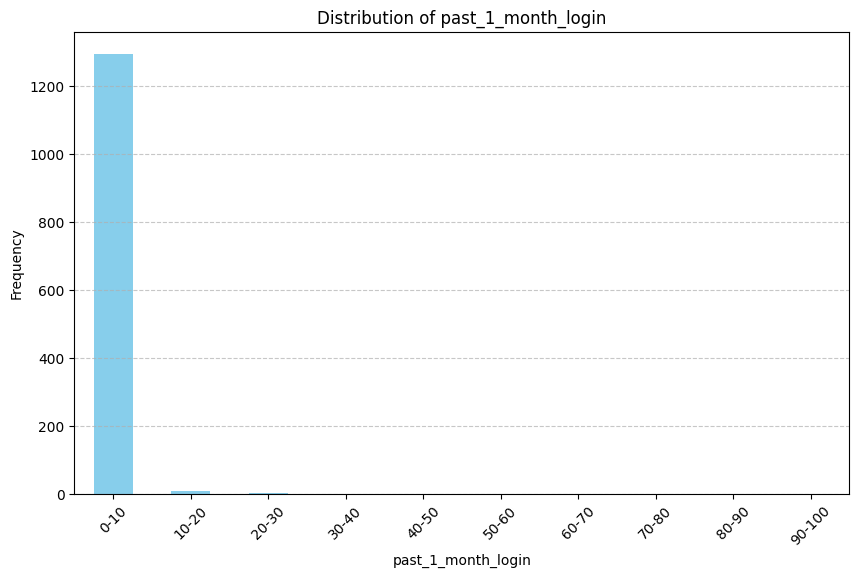

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터프레임에서 past_1_month_login 열 추출
past_1_month_login = train['past_1_month_login']

# 막대그래프를 그리기 위한 연속형 데이터의 분포 계산
bin_edges = range(0, int(past_1_month_login.max()) + 10, 10)
bin_labels = [f'{i}-{i+10}' for i in bin_edges[:-1]]  # 막대그래프의 x축 라벨 생성
binned_data = pd.cut(past_1_month_login, bins=bin_edges, labels=bin_labels, include_lowest=True)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
binned_data.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of past_1_month_login')
plt.xlabel('past_1_month_login')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 라인 추가
plt.show()

In [ ]:
train['sub_size'].value_counts()

0.0      1094
1.0        38
2.0        24
3.0        16
6.0        11
9.0        11
5.0         9
4.0         9
23.0        7
12.0        7
11.0        6
10.0        5
17.0        4
15.0        4
20.0        3
25.0        3
18.0        3
8.0         3
7.0         3
28.0        3
21.0        2
14.0        2
19.0        2
16.0        2
30.0        2
27.0        2
13.0        2
34.0        2
26.0        2
80.0        1
24.0        1
76.0        1
38.0        1
59.0        1
95.0        1
39.0        1
100.0       1
64.0        1
63.0        1
48.0        1
29.0        1
43.0        1
282.0       1
110.0       1
139.0       1
45.0        1
163.0       1
22.0        1
32.0        1
46.0        1
149.0       1
91.0        1
166.0       1
99.0        1
358.0       1
33.0        1
96.0        1
Name: sub_size, dtype: int64

In [ ]:
train['email_type'].value_counts()

0    794
1    276
2    166
3     44
4     29
Name: email_type, dtype: int64

In [ ]:
train['login'].value_counts()

0    1163
1     146
Name: login, dtype: int64

In [ ]:
train['apple_rat'].value_counts()

0.000000    958
1.000000    253
0.500000     10
0.250000      5
0.400000      4
           ... 
0.714286      1
0.016304      1
0.037037      1
0.142857      1
0.769231      1
Name: apple_rat, Length: 61, dtype: int64

# 2. Grid search
- 가장 먼저 Grid search를 통해 최적 파라미터를 찾고자 하였으나, 시간이 너무 오래 걸려 많은 경우의 수에 대해 최적의 파라미터 조합을 탐색하지 못함
- 직접 수를 넣어보며 성능 확인함
- 아래는 적은 범위로 여러번 Grid search를 진행하며, 좋은 성능이 나오는 특정 수를 대상으로 2시간 8분간의 Grid search 진행한 코드

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 학습 데이터 불러오기 1
train_data = pd.read_csv('train.csv')

# RandomForestClassifier 모델 정의
rf_model = RandomForestClassifier()

# 탐색할 하이퍼파라미터 범위 지정
param_grid = {
    'n_estimators': [300, 800], # 10 ~ 1000 사이의 양의 정수
    'criterion': ['gini','entropy'], # 옵션: 'gini', 'entropy'
    'max_depth': [90, 110], # None 또는 양의 정수
    'min_samples_split': [12, 17], # 2 이상의 정수 또는 0과 1 사이의 실수
    'min_samples_leaf': [14, 17], # 1 이상의 정수 또는 0과 0.5 사이의 실수 (비율을 나타냄, (0, 0.5] )
     'min_weight_fraction_leaf':[0.1], # 0.0에서 0.5 사이의 실수
    'max_features': ['auto'], # 옵션: 'auto', 'sqrt', 'log2', None 또는 양의 정수/실수
     'max_leaf_nodes' : [2] , # None 또는 양의 정수 # 0.0 이상의 실수
     'min_impurity_decrease' : [0.01, 0.005],
    'bootstrap': [True] # 옵션: True, False.
}

# GridSearchCV를 사용하여 그리드 탐색 진행
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(train_data.drop('login', axis=1), train_data['login'])

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 90, 'max_features': 'auto', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 14, 'min_samples_split': 12, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 300}


# 3. 제출

In [ ]:
cd submit

/content/drive/MyDrive/Dacon_RF_parameter_tuning/submit


In [ ]:
ls

submit0326_1.csv  submit0326_3.csv  submit0326_5.csv  test3.csv  test5.csv  test.csv
submit0326_2.csv  submit0326_4.csv  test2.csv         test4.csv  test6.csv


In [ ]:
# 제출 1. sample submit에서 n_estimators만 100->1000으로 증가
submit1 = pd.read_csv('test2.csv')
submit1

,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,min_weight_fraction_leaf,max_features,max_leaf_nodes,min_impurity_decrease,bootstrap
0,1000,gini,None,2,1,0,auto,None,0.0,True


In [ ]:
# 제출 2. sample submit에서 criterion을 gini -> entropy로 변경, n_estimators를 100->500으로 증가
submit2 = pd.read_csv('test3.csv')
submit2

,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,min_weight_fraction_leaf,max_features,max_leaf_nodes,min_impurity_decrease,bootstrap
0,500,entropy,None,2,1,0,auto,None,0.0,True


In [ ]:
# 제출 3. sample submit에서 n_estimators만 100->500으로 증가
submit3 = pd.read_csv('test4.csv')
submit3

,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,min_weight_fraction_leaf,max_features,max_leaf_nodes,min_impurity_decrease,bootstrap
0,500,gini,None,2,1,0,auto,None,0.0,True


# 4. 제출 결과

- 제출 1. sample submit에서 n_estimators만 100->500으로 증가
 - score : 0.7767009494
 - 분석 : sample submission score인 0.7797863924보다 성능이 하락했다. n_estimators가 커질수록 성능이 향상되는 일반적인 현상에 반대되는 결과가 나왔다. 너무 크게 설정한 것이 문제인 것 같다.

- 제출 2. sample submit에서 criterion을 gini -> entropy로 변경, n_estimators를 100->500으로 증가
 - score : 0.7774525316
 - 너무 큰 n_estimators가 문제인 것 같아 1000이 아닌 500만큼만 늘렸다.
 - 분석 : 제출1보다는 0.0007정도 좋은 성능이 나왔다.

- 제출 3. sample submit에서 n_estimators만 100->500으로 증가
 - score : 0.7803797468
 - 분석 : n_estimators를 1000으로 한 경우보다 성능 향상됨, 세 제출 중 가장 높은 score.  